In [ ]:
# Package installation if needed
%pip install -q scikit-learn joblib seaborn matplotlib

In [1]:
print("asdasd")

asdasd


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib

sns.set_context('notebook')
SEED = 42
np.random.seed(SEED)

os.makedirs('processed', exist_ok=True)

In [6]:
df = pd.read_csv('../dataset/MTS-Dialog-TrainingSet.csv')
print('Loaded dataset with', len(df), 'rows')

# Use preprocessed column if available; otherwise do a minimal normalization
if 'dialog_clean' not in df.columns:
    df['dialog_clean'] = df['dialogue'].fillna('').astype(str).str.replace('\n', ' ', regex=False).str.strip().str.lower()
else:
    df['dialog_clean'] = df['dialog_clean'].fillna('').astype(str)

# Choose target: by default use section_header if present
if 'section_header' in df.columns:
    target_col = 'section_header'
elif 'section_header_encoded' in df.columns:
    # if only encoded version exists, use it (but we prefer original names)
    target_col = 'section_header_encoded'
else:
    raise ValueError('No suitable target column found (expected section_header)')

# If target is text, encode it
if df[target_col].dtype == object or df[target_col].dtype == 'O':
    le = LabelEncoder()
    df['target_encoded'] = le.fit_transform(df[target_col].astype(str))
    label_encoder = le
else:
    df['target_encoded'] = df[target_col]
    label_encoder = None

# Show class distribution
print('Class distribution:')
print(df['target_encoded'].value_counts(normalize=False).sort_index())

# Prepare X,y
X = df['dialog_clean'].astype(str).tolist()
y = df['target_encoded'].values

# Stratified split (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED, stratify=y)
print(f'Prepared train/test: {len(X_train)} train, {len(X_test)} test')

Loaded dataset with 1201 rows
Class distribution:
target_encoded
0      60
1      34
2      77
3      19
4      15
5       8
6      23
7     351
8     282
9       5
10      6
11      8
12      2
13     54
14      2
15    118
16     63
17     11
18      3
19     60
Name: count, dtype: int64
Prepared train/test: 1020 train, 181 test


## Baseline 1: TF-IDF + Logistic Regression (GridSearchCV)
We use a small grid to tune `C` and `max_features`. Results are reported on the test set.

Starting GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=5000; total time=   1.0s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=5000; total time=   1.0s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=5000; total time=   1.1s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=5000; total time=   1.1s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=5000; total time=   1.0s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=10000; total time=   1.2s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=10000; total time=   1.2s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=10000; total time=   1.3s
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=5000; total time=   0.7s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=10000; total time=   1.2s
[CV] END clf__C=0.1, clf__class_weight=None, tfidf__max_features=10000; total time=   1.2s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.7s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.8s
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=10000; total time=   0.9s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.8s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.9s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.7s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.6s
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.9s
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_features=10000; total time=  16.1s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=5000; total time=   1.4s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=5000; total time=   1.3s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=5000; total time=   1.4s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=5000; total time=   1.5s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=5000; total time=   1.4s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=10000; total time=   1.7s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=10000; total time=   1.7s
[CV] END clf__C=1.0, clf__class_weight=None, tfidf__max_features=10000; total time=

/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.8s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.1s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.9s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.2s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.4s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.4s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  14.9s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.3s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=5000; total time=   2.5s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=5000; total time=   2.6s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=5000; total time=   2.6s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=5000; total time=   2.5s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=5000; total time=   2.6s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=10000; total time=   3.2s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=10000; total time=   3.2s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.7s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=10000; total time=   3.2s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=10000; total time=   3.3s
[CV] END clf__C=10.0, clf__class_weight=None, tfidf__max_features=10000; total time=   3.3s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  16.0s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.1s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  11.8s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.0s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.0s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=5000; total time=  12.3s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.1s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.4s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  15.5s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  14.9s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10.0, clf__class_weight=balanced, tfidf__max_features=10000; total time=  14.4s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:

Done. Best params: {'clf__C': 10.0, 'clf__class_weight': 'balanced', 'tfidf__max_features': 10000}
Classification report (LogReg on test set):
              precision    recall  f1-score   support

           0     1.0000    0.8889    0.9412         9
           1     1.0000    0.2000    0.3333         5
           2     0.6667    0.5000    0.5714        12
           3     0.5000    0.3333    0.4000         3
           4     1.0000    1.0000    1.0000         2
           5     0.0000    0.0000    0.0000         1
           6     1.0000    1.0000    1.0000         3
           7     0.8983    1.0000    0.9464        53
           8     0.7917    0.8837    0.8352        43
           9     1.0000    1.0000    1.0000         1
          10     0.0000    0.0000    0.0000         1
          11     0.0000    0.0000    0.0000         1
          13     1.0000    0.7500    0.8571         8
          15     0.6818    0.8333    0.7500        18
          16     0.7273    0.8000    0.7619   

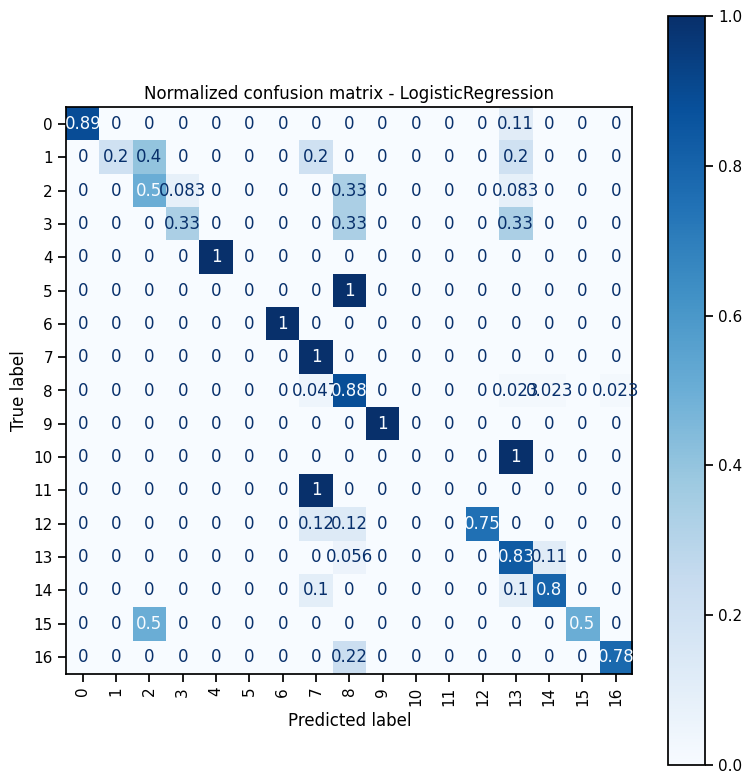

Saved best LogisticRegression pipeline to processed/tfidf_logreg_pipeline.joblib


In [ ]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words=None)),
    ('clf', LogisticRegression(max_iter=2000, solver='saga', random_state=SEED, n_jobs=-1))
])

param_grid_lr = {
    'tfidf__max_features': [5000, 10000],
    'clf__C': [0.1, 1.0, 10.0],
    'clf__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
gs_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=cv, scoring='f1_macro', n_jobs=4, verbose=2)
print('Starting GridSearchCV for LogisticRegression...')
gs_lr.fit(X_train, y_train)
print('Done. Best params:', gs_lr.best_params_)

best_lr = gs_lr.best_estimator_
y_pred = best_lr.predict(X_test)
print('Classification report (LogReg on test set):')
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix (normalized)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Normalized confusion matrix - LogisticRegression')
plt.tight_layout()
plt.show()

# Save pipeline and label encoder
joblib.dump(best_lr, 'shallow_processed/tfidf_logreg_pipeline.joblib')
if label_encoder is not None:
    joblib.dump(label_encoder, 'shallow_processed/label_encoder.joblib')
print('Saved best LogisticRegression pipeline to shallow_processed/tfidf_logreg_pipeline.joblib')

## Baseline 2: TF-IDF + LinearSVC (GridSearchCV)
LinearSVC is a fast linear classifier that often performs similarly to LogisticRegression for text tasks. We tune `C` and `max_features`.

Starting GridSearchCV for LinearSVC...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..............clf__C=0.01, tfidf__max_features=5000; total time=   0.2s
[CV] END ..............clf__C=0.01, tfidf__max_features=5000; total time=   0.2s


/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END ..............clf__C=0.01, tfidf__max_features=5000; total time=   0.2s
[CV] END ..............clf__C=0.01, tfidf__max_features=5000; total time=   0.2s
[CV] END ..............clf__C=0.01, tfidf__max_features=5000; total time=   0.2s
[CV] END .............clf__C=0.01, tfidf__max_features=10000; total time=   0.2s
[CV] END .............clf__C=0.01, tfidf__max_features=10000; total time=   0.2s
[CV] END .............clf__C=0.01, tfidf__max_features=10000; total time=   0.2s
[CV] END ...............clf__C=0.1, tfidf__max_features=5000; total time=   0.2s
[CV] END ...............clf__C=0.1, tfidf__max_features=5000; total time=   0.2s
[CV] END .............clf__C=0.01, tfidf__max_features=10000; total time=   0.2s
[CV] END ...............clf__C=0.1, tfidf__max_features=5000; total time=   0.2s
[CV] END ...............clf__C=0.1, tfidf__max_features=5000; total time=   0.2s
[CV] END .............clf__C=0.01, tfidf__max_features=10000; total time=   0.2s
[CV] END ...............clf_

/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bnnyrabbit/Uni/4.o/NLP/.env_nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

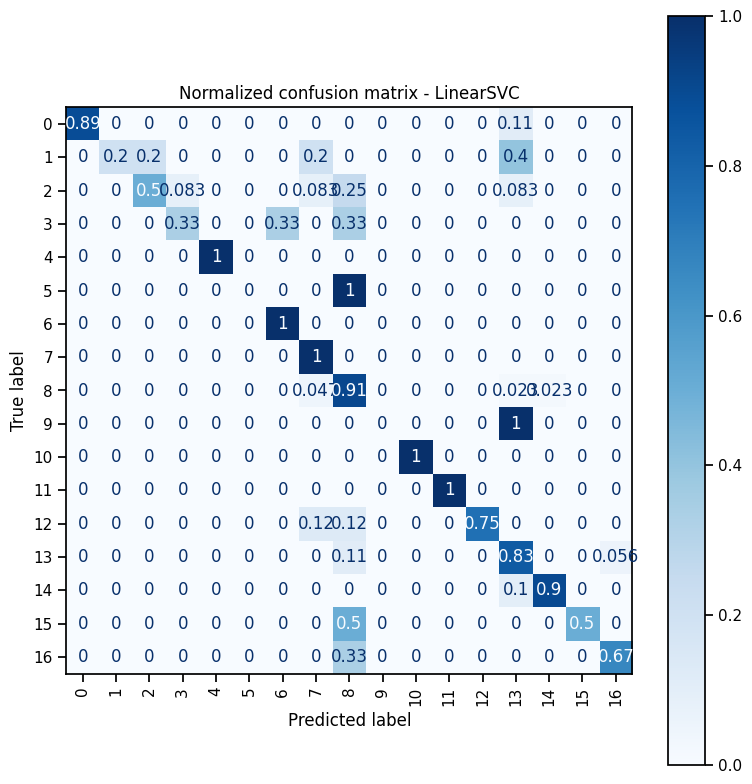

Saved best LinearSVC pipeline to processed/tfidf_linearsvc_pipeline.joblib


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words=None)),
    ('clf', LinearSVC(random_state=SEED, max_iter=5000))
])

param_grid_svc = {
    'tfidf__max_features': [5000, 10000],
    'clf__C': [0.01, 0.1, 1.0, 10.0]
}

gs_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=cv, scoring='f1_macro', n_jobs=4, verbose=2)
print('Starting GridSearchCV for LinearSVC...')
gs_svc.fit(X_train, y_train)
print('Done. Best params:', gs_svc.best_params_)

best_svc = gs_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print('Classification report (LinearSVC on test set):')
print(classification_report(y_test, y_pred_svc, digits=4))

cm2 = confusion_matrix(y_test, y_pred_svc, normalize='true')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
fig, ax = plt.subplots(figsize=(8, 8))
disp2.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Normalized confusion matrix - LinearSVC')
plt.tight_layout()
plt.show()

# Save pipeline
joblib.dump(best_svc, 'shallow_processed/tfidf_linearsvc_pipeline.joblib')
print('Saved best LinearSVC pipeline to shallow_processed/tfidf_linearsvc_pipeline.joblib')

## Next steps and notes
- If classes are highly imbalanced we should consider `class_weight='balanced'` (already included in the LR grid).
- We can add n-gram ranges, min_df, and alternative tokenizers to the TF-IDF stage.
- To speed up experiments, we can run `GridSearchCV` with fewer folds or smaller grids, or use `RandomizedSearchCV`.
- After good shallow baselines, we can add embedding-based shallow pipelines (FastText avg + classifier) and deep-learning models (BiLSTM, BERT fine-tune).
